### Visualizing the Data

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("/Users/Triveni/Desktop/dataScience/data/sqrAnalysisData.csv")
current = data[data['schoolYear']=='201617']
currentFeatures = current.iloc[:,0:15]
currentTargets = current.iloc[:,15:]

##### These sets of plots show the distribution of the graduation target variables to help understand the variation in graduation rates for different types of populations. The data is constrained to the class of 2017 for all NYC public high schools.

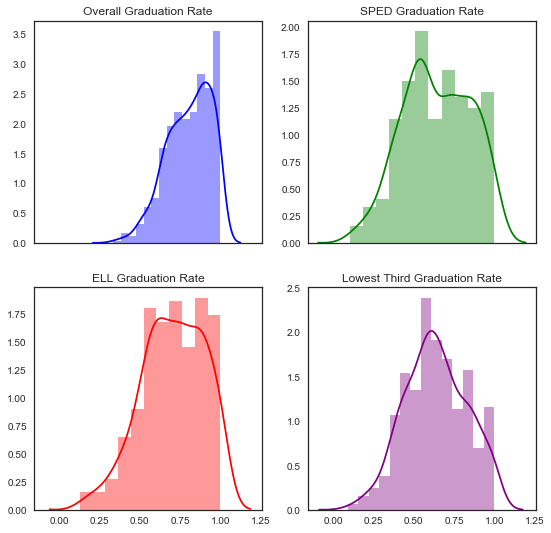

In [3]:
sns.set(style="white")
f, axes = plt.subplots(2, 2, figsize=(9, 9), sharex=True)
sns.distplot(currentTargets['4YearGraduationRate'].dropna().rename("") , color="blue", ax=axes[0, 0])
axes[0][0].set_title("Overall Graduation Rate")
sns.distplot(currentTargets['4YearGraduationRateSelfContainedIntegratedCoTeachingorSETSS'].dropna().rename(""), color="green", ax=axes[0, 1])
axes[0][1].set_title("SPED Graduation Rate")
sns.distplot(currentTargets['4YearGraduationRateEnglishLanguageLearners'].dropna().rename("") , color="red", ax=axes[1, 0])
axes[1][0].set_title("ELL Graduation Rate")
sns.distplot(currentTargets['4YearGraduationRateLowestThirdCitywide'].dropna().rename("") , color="purple", ax=axes[1, 1])
axes[1][1].set_title("Lowest Third Graduation Rate")

##### This histogram shows the overall College and Career Readiness Index for the class of 2017 in all NYC public high schools.

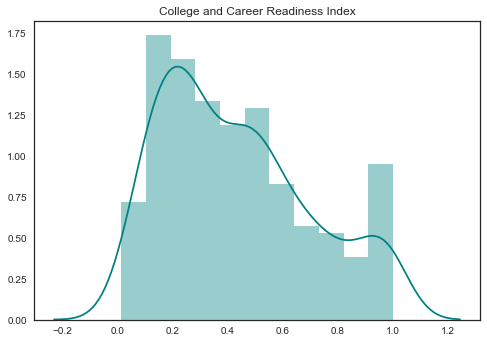

In [4]:
sns.set(style="white")
sns.distplot(currentTargets['collegeandCareerPreparatoryCourseIndex'].dropna().rename("") , color="teal").set_title("College and Career Readiness Index")

##### The following correlation plot shows how the features in the class of 2017 track with one another. 

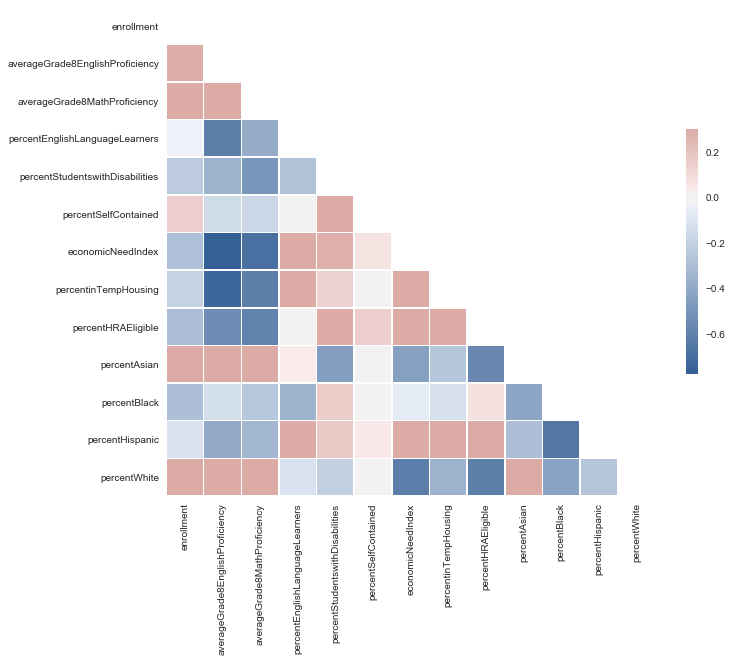

In [5]:
sns.set(style="white")
corr = currentFeatures.corr() # Compute the correlation matrix
mask = np.zeros_like(corr, dtype=np.bool) # Generate a mask for the upper triangle
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9)) # Set up the matplotlib figure
cmap = sns.diverging_palette(250, 15, s=75, l=40,n=9, center="light", as_cmap=True) # Generate a custom diverging colormap

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=.3, cmap = cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})